In [4]:
# preprocess image 

> Some classical image preprocessing methods are implemented in this script

In [5]:
#| default_exp preprocess

In [6]:
#| hide
%load_ext autoreload
%autoreload 2	

In [7]:
#| export
import cv2
import numpy as np
import matplotlib.pyplot as plt
from fastcore.all import *
import os
from pathlib import Path	

In [8]:
import matplotlib

In [9]:
#| export
from cv_tools.core import *

In [40]:
data_path =Path(os.getenv('DATA_PATH'))
path = Path(data_path, 'crack_detect_usm/test_data_sig1_cut_roi')
good_path = Path(data_path, 'crack_detect_usm/good_sym_cut_roi')

good_images_sig1 = good_path.filter_('sig_1')
crack_images = path.filter_('sig_0')


In [41]:
len(good_images_sig1)

5000

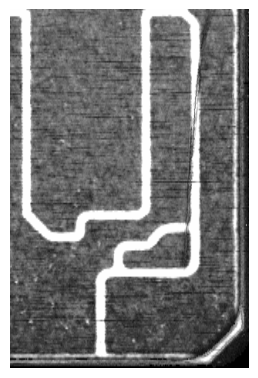

In [11]:
sm_img = read_img(crack_images[0])

show_(sm_img)

In [12]:
blur_img = cv2.GaussianBlur(sm_img, (5,5), 0)
new_img = blur_img.copy()


edges = cv2.Canny(blur_img, 50, 150)
cntrs = find_contours_binary(edges)
#cntrs = filter(lambda x: cv2.contourArea(x) > 10, cntrs)
mask = np.zeros_like(sm_img)
for c in cntrs:
	cv2.drawContours(mask, [c], -1, (255), thickness=cv2.FILLED)

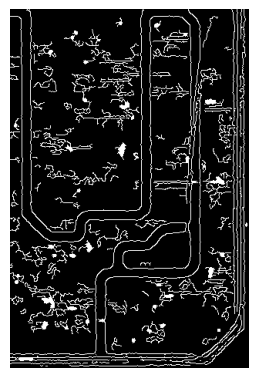

In [13]:
show_(mask)

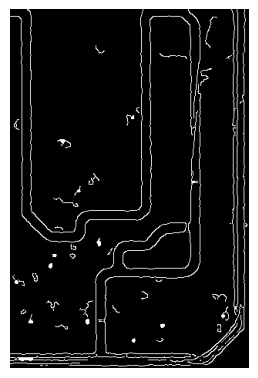

In [14]:
bl_img = cv2.bilateralFilter(blur_img, 11, 17, 17)
edges = cv2.Canny(bl_img, 50, 150)
cntrs = find_contours_binary(edges)
#cntrs = filter(lambda x: cv2.contourArea(x) > 10, cntrs)
mask = np.zeros_like(sm_img)
for c in cntrs:
	cv2.drawContours(mask, [c], -1, (255), thickness=cv2.FILLED)
show_(mask)

In [145]:
def edge_detect(
		img:np.ndarray, 
		filters=['blur'],# which filters to use 
		ks=5, # kernel size for blur
		):
	'canny edge detection'

	if filters:

		if 'blur' in filters:
			img = cv2.GaussianBlur(img, (ks,ks), 0)
		if 'median' in filters:
			img = cv2.medianBlur(img, ks)
		if 'bilateral' in filters:
			img = cv2.bilateralFilter(img, 11, 17, 17)

	edges = cv2.Canny(img, 50, 150)

	cntrs = find_contours_binary(edges)

	mask = np.zeros_like(img)
	for c in cntrs:
		cv2.drawContours(mask, [c], -1, (255), thickness=cv2.FILLED)
	return mask

In [122]:
def filter_img_(
        img:np.ndarray,
		filters=['blur'],# which filters to use
		ks=5, # kernel size for blur
		):

	if 'blur' in filters:
		img = cv2.GaussianBlur(img, (ks,ks), 0)
	if 'median' in filters:
		img = cv2.medianBlur(img, ks)
	if 'bilateral' in filters:
		img = cv2.bilateralFilter(img, 11, 17, 17)
	return img

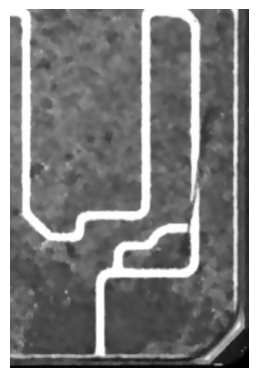

In [125]:
img_f = filter_img_(sm_img, filters=['blur', 'bilateral'])
show_(img_f)

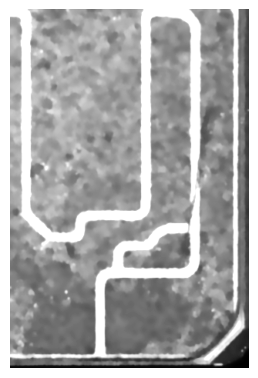

In [126]:
# Increase contrast
alpha = 1.5  # Contrast control (1.0-3.0)
beta = 0  # Brightness control (0-100)

adjusted = cv2.convertScaleAbs(img_f, alpha=alpha, beta=beta)

# Display the original and adjusted images
show_(adjusted)

In [128]:
from cv_tools.cv_ops import *

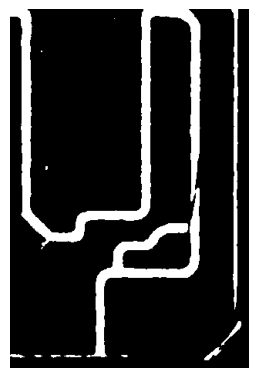

In [134]:
thrs_img = multi_otsu(img_f, classes=2)
show_(thrs_img)

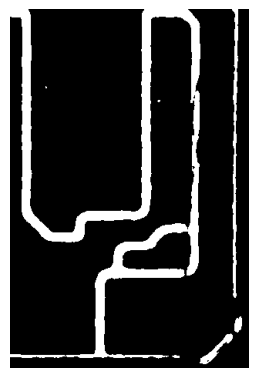

In [137]:
rnd_img = np.random.choice(crack_images,1)[0]
img_ = read_img(rnd_img)
new_img = filter_img_(img_, filters=['blur', 'bilateral'])
#thr_img = multi_otsu(new_img, classes=2)
show_(thr_img)


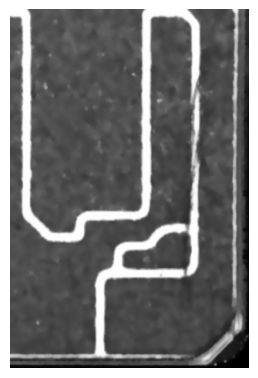

In [138]:
show_(new_img)

In [148]:
def sharpen_img(
        img):
	
	kernel = np.array([[-1, -1, -1],
                   	[-1,  9, -1],
                   	[-1, -1, -1]])
	sharpen_cv = cv2.filter2D(img, -1, kernel)
	return sharpen_cv

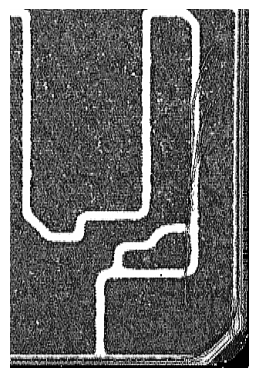

In [149]:
show_(sharpen_img(img_))

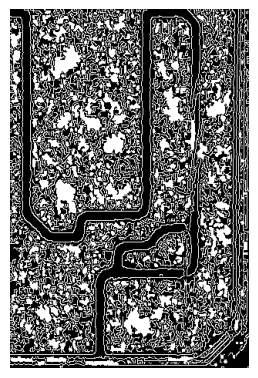

In [146]:
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])
sharpen_cv = cv2.filter2D(img_, -1, kernel)
f_img = filter_img_(sharpen_cv, filters=['bilateral'])
f_img = filter_img_(f_img, filters=['blur'])
e_img = edge_detect(f_img, filters=None)
show_(e_img)

In [152]:
def get_random_crack_img(
    ):
	fn = np.random.choice(crack_images,1)[0]
	img = read_img(fn)
	return fn, img

In [194]:
def get_random_good_img(
    ):

	good_path = Path(data_path, 'crack_detect_usm/good_sym_cut_roi')
	good_images_sig1 = good_path.filter_('sig_1')
	fn = np.random.choice(good_images_sig1,1)[0]
	img = read_img(fn)
	return fn, img

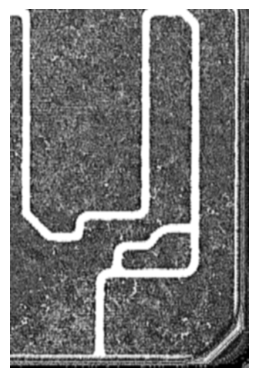

In [205]:
fn, img = get_random_good_img()
s_img = sharpen_img(img)
new_img = filter_img_(s_img, filters=['blur'])
show_(new_img)

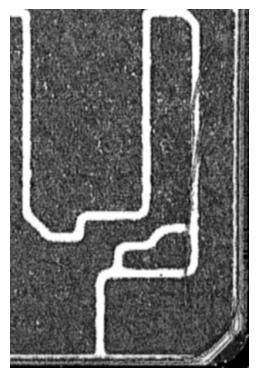

In [192]:

fn, img = get_random_crack_img()
s_img = sharpen_img(img)
new_img = filter_img_(s_img, filters=['blur'])
show_(new_img)

# indexing of some image

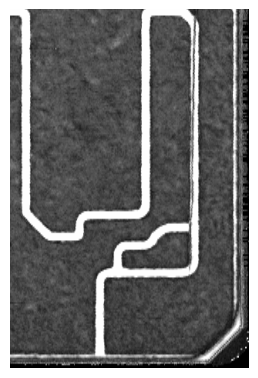

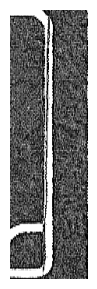

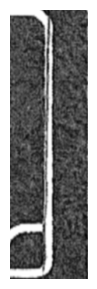

In [250]:
fn, img = get_random_crack_img()
n_img = sharpen_img(img)
new_img = filter_img_(n_img, filters=['blur'])
show_([img, n_img[:350, 190:-20], new_img[:350, 190:-20]])

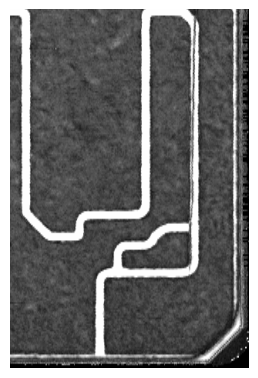

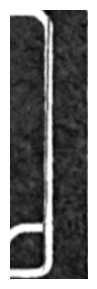

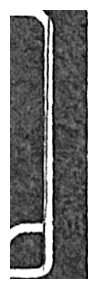

In [252]:
n_img = sharpen_img(img)
new_img = filter_img_(img, filters=['blur'])
s_img = sharpen_img(new_img)
show_([img, new_img[:350, 190:-20], s_img[:350, 190:-20]])